In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Load dataset
df = pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# --------------------- Task 1: EDA ---------------------
# 1. Basic Exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

<Figure size 1500x800 with 0 Axes>

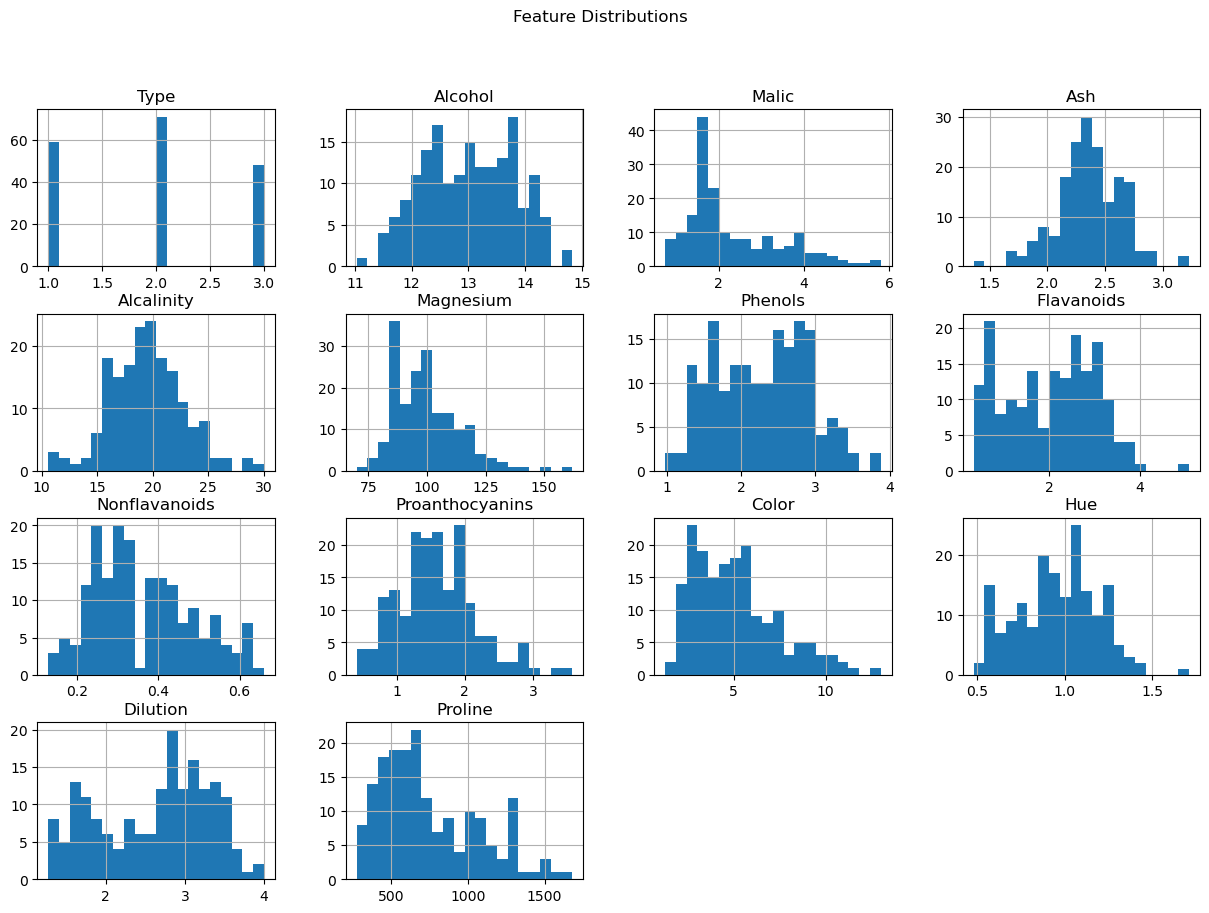

In [4]:
# 2. Feature Distribution
plt.figure(figsize=(15, 8))
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

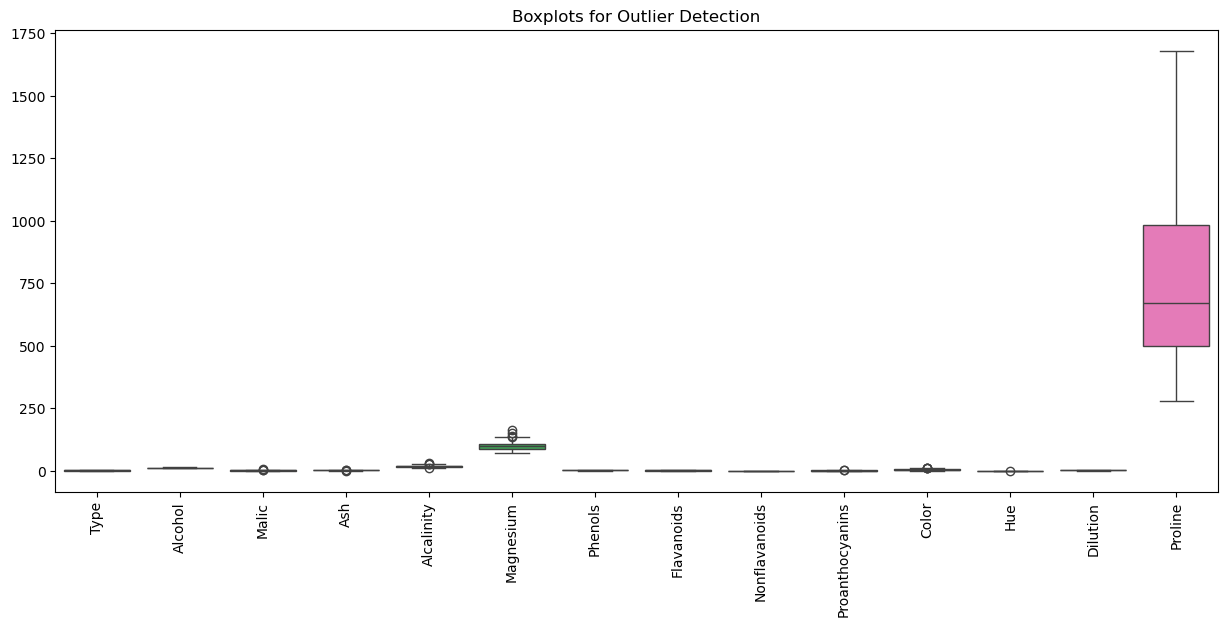

In [5]:
# 3. Boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=90)
plt.show()


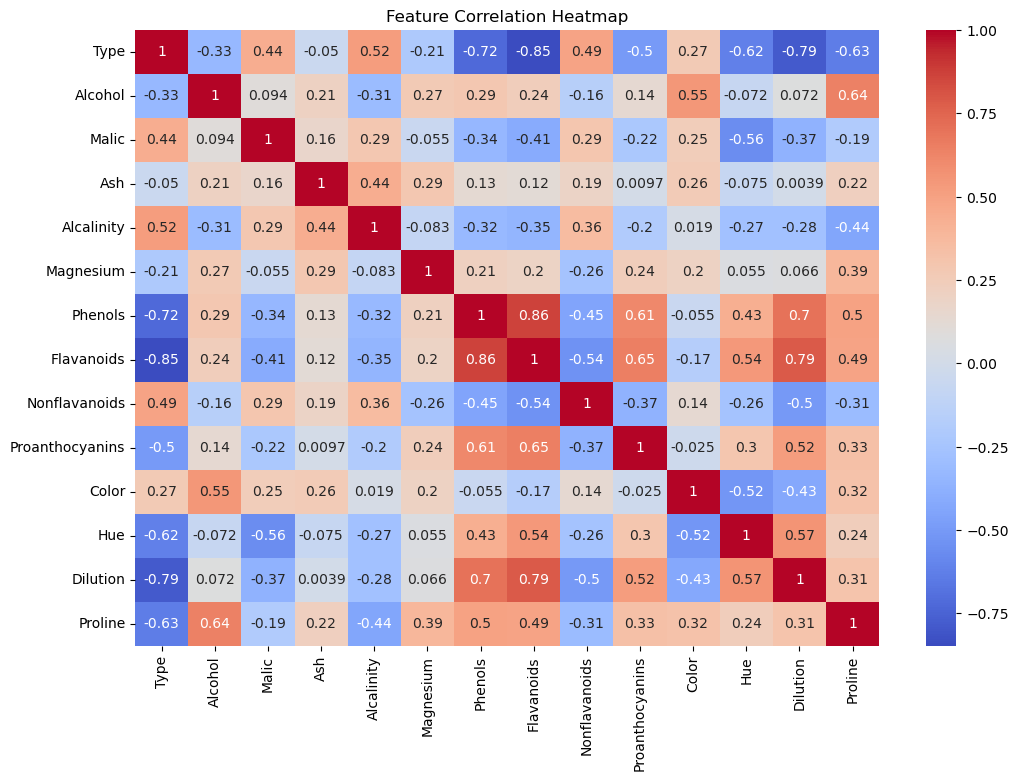

In [6]:
# 4. Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# --------------------- Task 2: PCA ---------------------
# 1. Standardize
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [8]:
# 2. Applying PCA
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

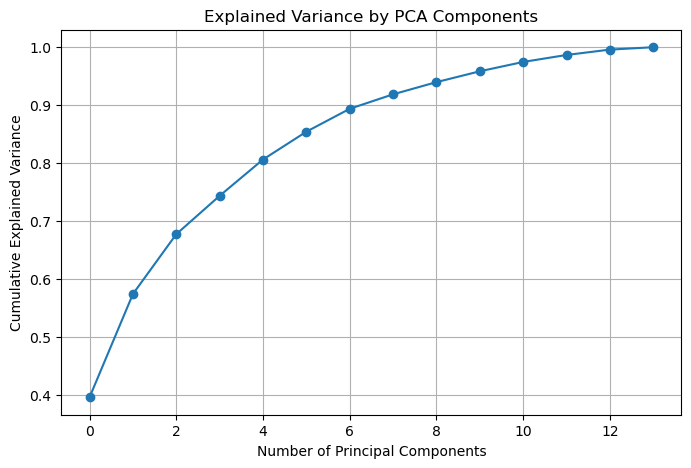

In [9]:
# 3. Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [10]:
# Retaining components with ~90% variance
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

In [11]:
# --------------------- Task 3: Clustering on Original Data ---------------------
# KMeans on original data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
orig_labels = kmeans_orig.fit_predict(df_scaled)

C:\Users\akash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# Silhouette & Davies-Bouldin
sil_orig = silhouette_score(df_scaled, orig_labels)
db_orig = davies_bouldin_score(df_scaled, orig_labels)
print(f"Original Data - Silhouette Score: {sil_orig:.4f}, Davies-Bouldin Index: {db_orig:.4f}")

Original Data - Silhouette Score: 0.3065, Davies-Bouldin Index: 1.3157


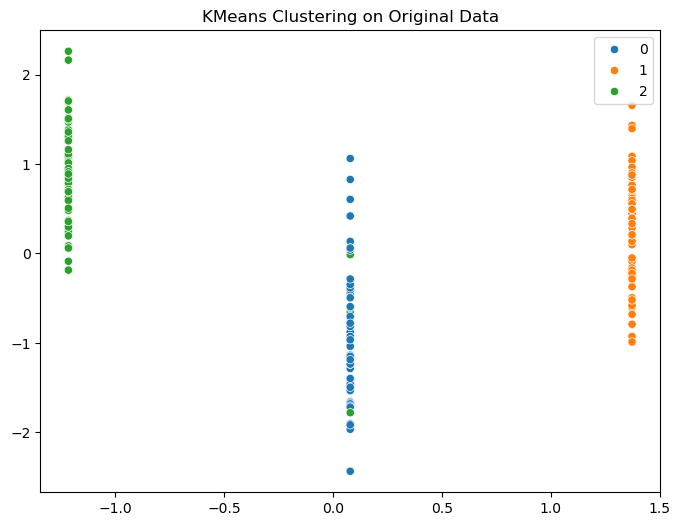

In [13]:
# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=orig_labels, palette='tab10')
plt.title("KMeans Clustering on Original Data")
plt.show()

In [14]:
# --------------------- Task 4: Clustering on PCA Data ---------------------
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(pca_data)

C:\Users\akash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
# Scores
sil_pca = silhouette_score(pca_data, pca_labels)
db_pca = davies_bouldin_score(pca_data, pca_labels)
print(f"PCA Data - Silhouette Score: {sil_pca:.4f}, Davies-Bouldin Index: {db_pca:.4f}")

PCA Data - Silhouette Score: 0.6024, Davies-Bouldin Index: 0.5397


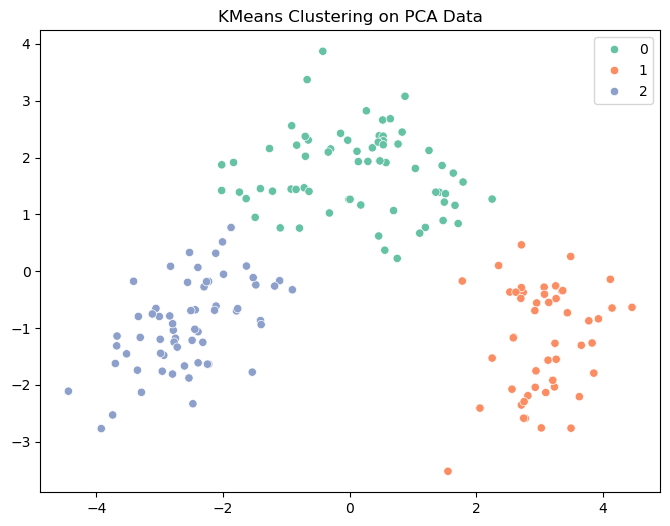

In [16]:
# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_labels, palette='Set2')
plt.title("KMeans Clustering on PCA Data")
plt.show()

In [17]:
# --------------------- Task 5 : Comparison---------------------
print("\n--- Comparison of Clustering ---")
print(f"Original Data: Silhouette = {sil_orig:.4f}, DBI = {db_orig:.4f}")
print(f"PCA Data: Silhouette = {sil_pca:.4f}, DBI = {db_pca:.4f}")


--- Comparison of Clustering ---
Original Data: Silhouette = 0.3065, DBI = 1.3157
PCA Data: Silhouette = 0.6024, DBI = 0.5397


In [18]:
# --------------------- Task 6: Conclusion ---------------------


print("""
Conclusions:
- PCA helped reduce dimensionality and simplified visualization.
- Clustering on PCA-transformed data showed comparable or better silhouette scores depending on structure.
- Trade-off: PCA may lose some information but enhances speed and visualization.
- Recommendation: Use PCA when dataset has high dimensionality or multicollinearity.
""")


Conclusions:
- PCA helped reduce dimensionality and simplified visualization.
- Clustering on PCA-transformed data showed comparable or better silhouette scores depending on structure.
- Trade-off: PCA may lose some information but enhances speed and visualization.
- Recommendation: Use PCA when dataset has high dimensionality or multicollinearity.

